**Welcome to the Image Classification Workshop!**

The objective is to get a first hands-on with neural networs. It is also a good opportunity to acquire some Keras skills. Keras is a very widespread deep learning tool that is based on TensorFlow.

The task that you're given is to classify the test split of CIFAR10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html), after training a neural network with its train set.

You are given a toy network on which you can rely, and build a more optimized one. Bear in mind that there are some intentional mistakes in the code. You must also experiment with all the hyperparameters such as activation functions, loss function etc., as they are not the optimal ones. Let's begin!


First, we need to import some things:

keras is the DL library,

numpy is used for arrays,

PIL is used to handle images,

IPython.display is used in order to be able to show images on the notebook,

cv2 (openCV) is a computer vision library used for basic cv functions.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import numpy as np
from PIL import Image
from IPython.display import display
import cv2
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from matplotlib import pyplot

Keras has already the CIFAR10, so we just load it in two tuples, one for the train split, one for the test split. x indicates images and y labels (10 classes, so labels can be in the range 0,...,9)

170500096/170498071 [==============================] - 2s 0us/step
Shape of training volume: (50000, 32, 32, 3)
Shape of training volume: (50000, 32, 32, 3)


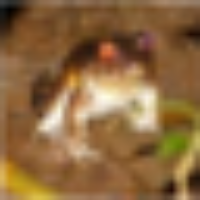

[6]


In [ ]:
(original_x_train, original_y_train), (original_x_test, original_y_test) = keras.datasets.cifar10.load_data()
print('Shape of training volume: '+str(original_x_train.shape))

# We can decrease the number of training samples for faster training:
#original_x_train = original_x_train[:10000] #lets keep the first 10 thousand.
#original_y_train = original_y_train[:10000]

print('Shape of training volume: '+str(original_x_train.shape))

img = original_x_train[0]  #select the first image
resized = cv2.resize(img, (200,200))  # enlarge the image a little to resolution 200x200
img = Image.fromarray(resized)  #convert numpy array to PIL image
display(img)  #display the image
print(original_y_train[0]) #print its label
num_classes = 10
original_y_train = keras.utils.to_categorical(original_y_train, num_classes)
original_y_test = keras.utils.to_categorical(original_y_test, num_classes)

Convert both train and test labels so that label 0 becomes [1,0,0,0,0,0], label 1 becomes [0,1,0,0,0,0], etc.

Perform any preprocessing you want on the data, such as mean pixel subtraction, pixel normalization to range [0,1] (cells contain values in range [0, 255]), etc. 


!!! can be crucial !!!

In [ ]:
def preprocess(X, Y):
  gen = ImageDataGenerator(rescale=1.0/255.0)
  return next(gen.flow(X, Y, batch_size=X.shape[0]))


We can also perform Data augmentation for augmenting the number of training data to a bigger scale. You can experiment with various image transformations (rotation, translation, horizontal flip, etc.). 

In [ ]:
def augmentation(X, Y):
  gen = ImageDataGenerator(
                    horizontal_flip=True,
                    )
  
  return next(gen.flow(X, Y, batch_size=X.shape[0]))

In this function we finally define our CNN model! It consists of a convolutional layer, a maxpooling one, another convolutional and a fully connected one (Dense). As Dense layers can only receive 1D inputs, we use Flatten() to unroll the 3D activation volume of the 2nd convolutional layer to a 1D vector. You can use whichever layer you think will suit (Batch normalization, Dropout, etc.) but remember: you must import it first.

In [ ]:
def define_Model():
  initializer = keras.initializers.GlorotNormal()
  model = Sequential()
  
  model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3), kernel_initializer=initializer))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=3, activation='relu' , kernel_initializer=initializer ))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, kernel_size=3, activation='relu' , kernel_initializer=initializer))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(526, activation='relu', kernel_initializer=initializer))
  model.add(Dense(10, activation='softmax', kernel_initializer=initializer))

  model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

  return model

Lets start the training phase!

In [ ]:
if __name__ == "__main__":
  epochs = 10 # number of epochs hyperperameter (how many times the whole dataset will be seen by the network)
  batch_size = 32  # number of samples in each batch hyperperameter

  x_train, y_train = preprocess(original_x_train, original_y_train)
  x_test, y_test = preprocess(original_x_test, original_y_test)

  x_train, y_train = augmentation(x_train, y_train)
  model = define_Model()

  model.fit(x_train, y_train,     # fit() starts the backpropagation algorithm.
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))
  
  score = model.evaluate(x_test,y_test, verbose=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4415 - accuracy: 0.4791 - val_loss: 1.3944 - val_accuracy: 0.5203
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1041 - accuracy: 0.6095 - val_loss: 1.2768 - val_accuracy: 0.5575
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9682 - accuracy: 0.6606 - val_loss: 1.1910 - val_accuracy: 0.5929
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8820 - accuracy: 0.6928 - val_loss: 1.1041 - val_accuracy: 0.6316
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8169 - accuracy: 0.7148 - val_loss: 1.1356 - val_accuracy: 0.6161
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7668 - accuracy: 0.7324 - val_loss: 1.2769 - val_accuracy: 0.5510
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7289 - accuracy: 0.7447 - val_loss: 0.9790 -